# VEHICLE INSURANCE CLAIM FRAUD DETECTION

## 1. INDUSTRIAL UNDERSTANDING
- Related with insurance industry which is General Insurance and focusing on the sub-group, car insurance
- When the vehicle accident had been occur, we want to know if claim’s fraud from the insured or from the third party and to find if any variant that related with the causes of fraudulent in their claims.


## 2. DATA UNDERSTANDING
The data used from Kaggle website, Vehicle Insurance Claim Fraud Detection (https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data), where it consist 33 columns. Main keys variables will be selected base on the data comprehension.

### 2.1 DATA COMPREHENSION
    a. Which area that have most claim, urban or rural area?
    b. Which gender had high car insurance claim?
    c. What is marital status of the insured?
    d. Who had cause the car insurance claim, third party or policy holder?  
    e. what type (or category) of the car that related with car insurance claim?
    f. Is it fraud any fraud in car insurance claim?
    g. Is it any report had been submit to the police about the car accident?
    h. Is it any witness in the cases of car accident?
    i. Which type of agent in car insurance claim, external or internal?

### 2.2 DATA COMPOSITION
    a. Accident area (Urban/ Rural)
    b. Gender of the car insurance’s claimer (Male/ Female)
    c. Marital status of the insured (Single/ Married/ Divorce/ Widow)
    d. A person who claimed the car insurance (Third-party/ Policy holder)
    e. Category of vehicle (Sedan/ Sport/ Utility)
    f. Fraud found from claim (Yes/No)
    g. Cars’ police report (Yes/ No)
    h. Witness of the causes (Yes/ No)
    i. Type of agent (Internal/ External)

From the data comprehension, 9 out 33 columns will be seleted as varriables where "Fraud found from claim" will be use as target variables.

### 2.3 DATASET SUMMARY/ ABOUT DATASET

#### Import library

In [1]:
import pandas as pd
import numpy as np
import csv        
import os

os.getcwd()
os.chdir('C:/Users/najsy/')
os.listdir('./VIFD')

import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

C:\Users\najsy


In [3]:
#### Read file.csv
car_insurance = pd.read_csv("./VIFD/fraud_oracle.csv")

In [4]:
(car_insurance.dtypes)

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [5]:
car_insurance.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
car_insurance.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


#### Variables Selection

In [7]:
car_insurance_fraud = car_insurance[['FraudFound_P','AccidentArea','AgentType','Fault','MaritalStatus','PoliceReportFiled','Sex','VehicleCategory',	'WitnessPresent']]

In [8]:
car_insurance_fraud.head()

,FraudFound_P,AccidentArea,AgentType,Fault,MaritalStatus,PoliceReportFiled,Sex,VehicleCategory,WitnessPresent
0,0,Urban,External,Policy Holder,Single,No,Female,Sport,No
1,0,Urban,External,Policy Holder,Single,Yes,Male,Sport,No
2,0,Urban,External,Policy Holder,Married,No,Male,Sport,No
3,0,Rural,External,Third Party,Married,Yes,Male,Sport,No
4,0,Urban,External,Third Party,Single,No,Female,Sport,No


In [9]:
(car_insurance_fraud.dtypes)

FraudFound_P          int64
AccidentArea         object
AgentType            object
Fault                object
MaritalStatus        object
PoliceReportFiled    object
Sex                  object
VehicleCategory      object
WitnessPresent       object
dtype: object

#### Missing values

In [10]:
missing_values = car_insurance_fraud.isnull()

missing_values.head(20)

,FraudFound_P,AccidentArea,AgentType,Fault,MaritalStatus,PoliceReportFiled,Sex,VehicleCategory,WitnessPresent
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_values.columns.values.tolist():
    print (column)
    print (missing_values[column].value_counts())
    print ('')

FraudFound_P
FraudFound_P
False    15420
Name: count, dtype: int64

AccidentArea
AccidentArea
False    15420
Name: count, dtype: int64

AgentType
AgentType
False    15420
Name: count, dtype: int64

Fault
Fault
False    15420
Name: count, dtype: int64

MaritalStatus
MaritalStatus
False    15420
Name: count, dtype: int64

PoliceReportFiled
PoliceReportFiled
False    15420
Name: count, dtype: int64

Sex
Sex
False    15420
Name: count, dtype: int64

VehicleCategory
VehicleCategory
False    15420
Name: count, dtype: int64

WitnessPresent
WitnessPresent
False    15420
Name: count, dtype: int64



##### - From the data had shown no missing values

#### Identify number of figure from each of variables

##### a. AccidentArea

In [12]:
car_insurance_fraud['AccidentArea'].value_counts()

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

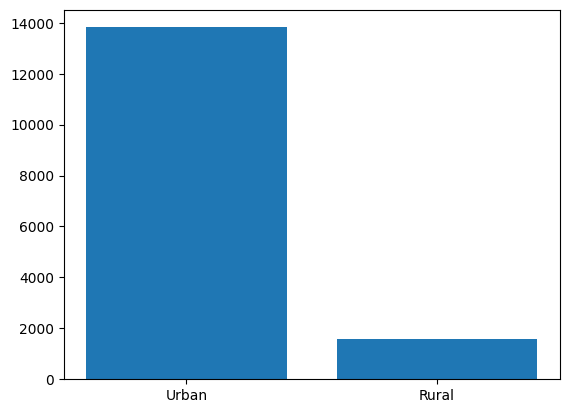

In [13]:
AccidentArea = ["Urban", "Rural"]  
counts = [13822,1598]
plt.bar(AccidentArea, counts) 
 
plt.show() 

- From the figure, we can conclude that many accident already occur at urban (13,822 cases) compare to rural (1,598 cases)

##### b. AgentType

In [14]:
car_insurance_fraud['AgentType'].value_counts()

AgentType
External    15179
Internal      241
Name: count, dtype: int64

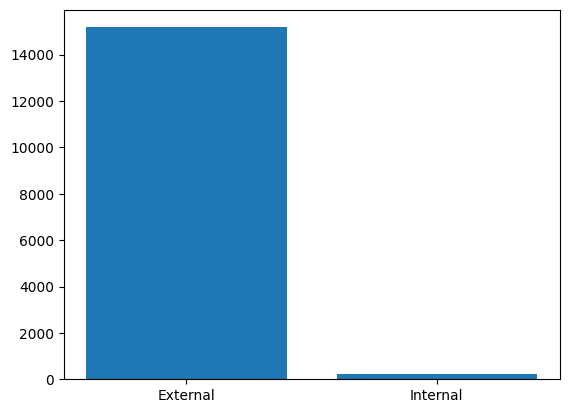

In [15]:
AgentType = ["External", "Internal"]  
counts = [15179,241]
plt.bar(AgentType, counts) 
 
plt.show() 

- From the figure, we can conclude that many accident are using external agent (15,179 cases) to compare with internal agent (241 cases)

##### c. Fault

In [16]:
car_insurance_fraud['Fault'].value_counts()

Fault
Policy Holder    11230
Third Party       4190
Name: count, dtype: int64

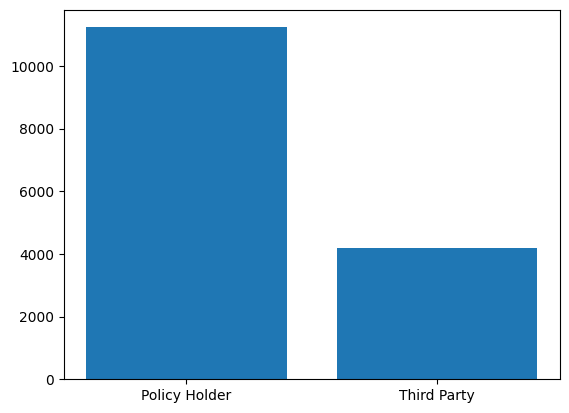

In [17]:
Fault = ["Policy Holder", "Third Party"]  
counts = [11230,4190]
plt.bar(Fault, counts) 
 
plt.show() 

- From figure, we can conclude that many fault from Policy holder (11,230 cases) to compare with internal agent (4190 cases)	

##### d. MaritalStatus

In [18]:
car_insurance_fraud['MaritalStatus'].value_counts()

MaritalStatus
Married     10625
Single       4684
Divorced       76
Widow          35
Name: count, dtype: int64

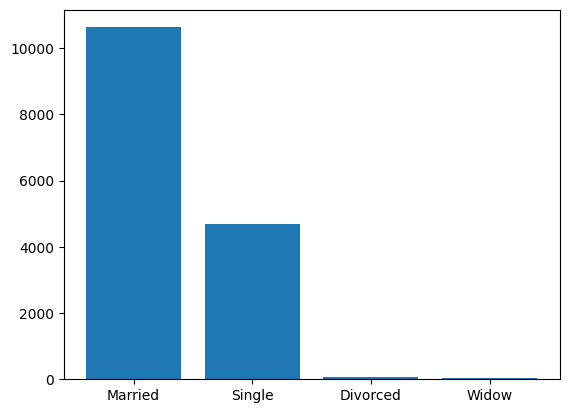

In [19]:
MaritalStatus = ["Married", "Single", "Divorced", "Widow"]  
counts = [10625,4684,76,35]
plt.bar(MaritalStatus, counts) 
 
plt.show() 

- From figure, we can conclude that the highest report came from Married person (10,625 cases) to compare with single person (4,684 cases), Divorced (76 cases), and Widow (35 cases) 	

##### e. PoliceReportFiled

In [20]:
car_insurance_fraud['PoliceReportFiled'].value_counts()

PoliceReportFiled
No     14992
Yes      428
Name: count, dtype: int64

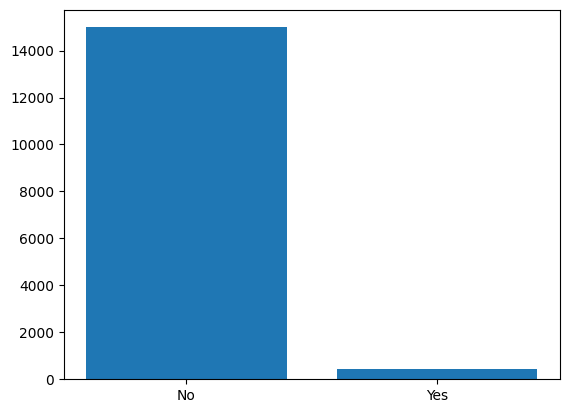

In [21]:
PoliceReportFiled = ["No", "Yes"]  
counts = [14992,428]
plt.bar(PoliceReportFiled, counts) 
 
plt.show() 

- From the report, we can conclude that most of the policy holder does not do Police Report, N0( 14,992 cases) compare to who does, YES (428 cases)

##### f. Sex

In [22]:
car_insurance_fraud['Sex'].value_counts()

Sex
Male      13000
Female     2420
Name: count, dtype: int64

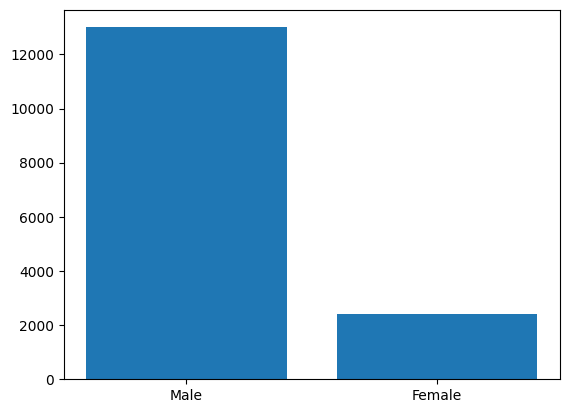

In [23]:
Sex = ["Male", "Female"]  
counts = [13000,2420]
plt.bar(Sex, counts) 
 
plt.show() 

- From the report, we can conclude that the claim mostly came from Male (13,000 cases) compare to female (2,420 cases)

##### g. VehicleCategory

In [24]:
car_insurance_fraud['VehicleCategory'].value_counts()

VehicleCategory
Sedan      9671
Sport      5358
Utility     391
Name: count, dtype: int64

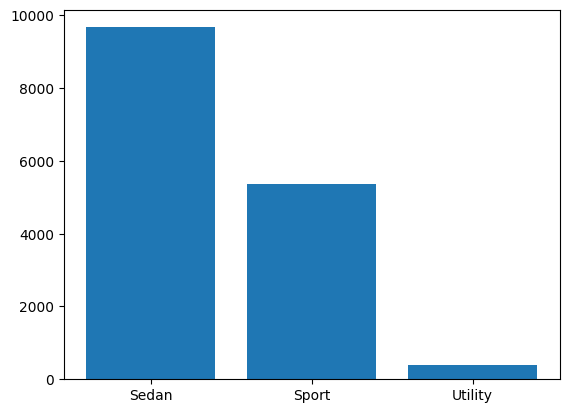

In [25]:
VehicleCategory = ["Sedan", "Sport","Utility"]  
counts = [9671,5358,391]
plt.bar(VehicleCategory, counts) 
 
plt.show() 

- From the report, we can conclude that the highest vehicles insurance claim from Sedan model (9,671 cases) compare to Sport model (5,358 cases) and Utility model (391 cases)

##### h. WitnessPresent

In [26]:
car_insurance_fraud['WitnessPresent'].value_counts()

WitnessPresent
No     15333
Yes       87
Name: count, dtype: int64

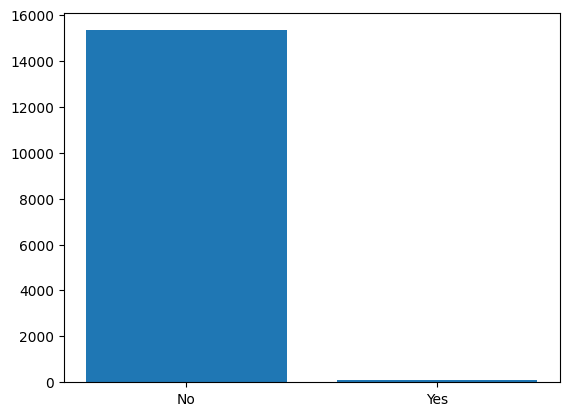

In [27]:
WitnessPresent = ["No", "Yes"]  
counts = [15333,87]
plt.bar(WitnessPresent, counts) 
 
plt.show() 

- From the figure show mostly the car insurance holder does not bring thier own witness, NO (15,333 cases) compare who does, YES (87 cases)

##### i. FraudFound_P (Target variables)

In [28]:
car_insurance_fraud['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

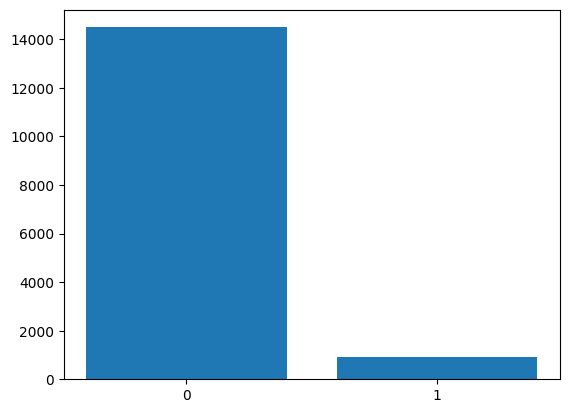

In [29]:
FraudFound_P = ["0", "1"]  
counts = [14497,923]
plt.bar(FraudFound_P, counts) 
 
plt.show() 

- From the figure show the numbers of policy holder who was not fraud, 0 (14,497) and fraud, 1 (923)
- Since our target variables were imbalance, we will balance the data by using SMOTE.

### 3. DATA PREPARATION

#### 3.1 Machine Learning - Preparation

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [31]:
encoder = LabelEncoder()

In [32]:
car_insurance_fraud['AccidentArea'] = encoder.fit_transform(car_insurance_fraud['AccidentArea'])
car_insurance_fraud['AgentType'] = encoder.fit_transform(car_insurance_fraud['AgentType'])
car_insurance_fraud['Fault'] = encoder.fit_transform(car_insurance_fraud['Fault'])
car_insurance_fraud['MaritalStatus'] = encoder.fit_transform(car_insurance_fraud['MaritalStatus'])
car_insurance_fraud['PoliceReportFiled'] = encoder.fit_transform(car_insurance_fraud['PoliceReportFiled'])
car_insurance_fraud['Sex'] = encoder.fit_transform(car_insurance_fraud['Sex'])
car_insurance_fraud['VehicleCategory'] = encoder.fit_transform(car_insurance_fraud['VehicleCategory'])
car_insurance_fraud['WitnessPresent'] = encoder.fit_transform(car_insurance_fraud['WitnessPresent'])

C:\Users\najsy\AppData\Local\Temp\ipykernel_18056\2135919607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_insurance_fraud['AccidentArea'] = encoder.fit_transform(car_insurance_fraud['AccidentArea'])
C:\Users\najsy\AppData\Local\Temp\ipykernel_18056\2135919607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_insurance_fraud['AgentType'] = encoder.fit_transform(car_insurance_fraud['AgentType'])
C:\Users\najsy\AppData\Local\Temp\ipykernel_18056\2135919607.py:3: SettingWithCopyWarning: 
A valu

In [33]:
(car_insurance_fraud.dtypes)

FraudFound_P         int64
AccidentArea         int64
AgentType            int64
Fault                int64
MaritalStatus        int64
PoliceReportFiled    int64
Sex                  int64
VehicleCategory      int64
WitnessPresent       int64
dtype: object

In [34]:
car_insurance_fraud = pd.DataFrame(car_insurance_fraud)
save_directory = './VIFD'

# Define the filename
file_name = "car_insurance_fraud.csv"

# Create the full file path
file_path = os.path.join(save_directory, file_name)

# Save the DataFrame as a CSV file
car_insurance_fraud.to_csv(file_path, index=False)

In [35]:
car_insurance_fraud['FraudFound_P'] = encoder.fit_transform(car_insurance_fraud['FraudFound_P'])

In [36]:
car_insurance_fraud.head()

,FraudFound_P,AccidentArea,AgentType,Fault,MaritalStatus,PoliceReportFiled,Sex,VehicleCategory,WitnessPresent
0,0,1,0,0,2,0,0,1,0
1,0,1,0,0,2,1,1,1,0
2,0,1,0,0,1,0,1,1,0
3,0,0,0,1,1,1,1,1,0
4,0,1,0,1,2,0,0,1,0


##### 3.1.a Double check the value change in variables

###### i. AccidentArea

AccidentArea:
<br>
Urban = 13822
<br>
Rural = 1598
<br>
Name: count, dtype: int64

In [37]:
car_insurance_fraud['AccidentArea'].value_counts()

AccidentArea
1    13822
0     1598
Name: count, dtype: int64

###### ii.  AgentType

AgentType:
<br>
External = 15179
<br>
Internal = 241
<br>
Name: count, dtype: int64

In [38]:
car_insurance_fraud['AgentType'].value_counts()

AgentType
0    15179
1      241
Name: count, dtype: int64

###### iii. Fault

Fault:
<br>
Policy Holder = 11230
<br>
Third Party = 4190
<br>
Name: count, dtype: int64

In [39]:
car_insurance_fraud['Fault'].value_counts()

Fault
0    11230
1     4190
Name: count, dtype: int64

###### iv. MaritalStatus

MaritalStatus:
<br>
Married = 10625
<br>
Single = 4684
<br>
Divorced = 76
<br>
Widow = 35
<br>
Name: count, dtype: int64

In [40]:
car_insurance_fraud['MaritalStatus'].value_counts()

MaritalStatus
1    10625
2     4684
0       76
3       35
Name: count, dtype: int64

###### v. PoliceReportFiled 

PoliceReportFiled:
<br>
No = 14992
<br>
Yes = 428
<br>
Name: count, dtype: int64

In [41]:
car_insurance_fraud['PoliceReportFiled'].value_counts()

PoliceReportFiled
0    14992
1      428
Name: count, dtype: int64

###### vi. Sex

Sex:
<br>
Male = 13000
<br>
Female = 2420
<br>
Name: count, dtype: int64

In [42]:
car_insurance_fraud['Sex'].value_counts()

Sex
1    13000
0     2420
Name: count, dtype: int64

###### vii. VehicleCategory


VehicleCategory:
<br>
Sedan = 9671
<br>
Sport = 5358
<br>
Utility = 391
<br>
Name: count, dtype: int64

In [43]:
car_insurance_fraud['VehicleCategory'].value_counts()

VehicleCategory
0    9671
1    5358
2     391
Name: count, dtype: int64

###### viii. WitnessPresent

WitnessPresent:
<br>
No = 15333
<br>
Yes = 87
<br>
Name: count, dtype: int64

In [44]:
car_insurance_fraud['WitnessPresent'].value_counts()

WitnessPresent
0    15333
1       87
Name: count, dtype: int64

FraudFound_P: No = 0, Yes = 1,
<br>
0 = 14497
<br>
1 = 923
<br>
Name: count, dtype: int64

#### 3.2 SMOTE

In [45]:
X = car_insurance_fraud.drop(["FraudFound_P"], axis = 1).values
y = car_insurance_fraud["FraudFound_P"]

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE(sampling_strategy='minority')
X,y=smote.fit_resample(X,y)
y.value_counts()

FraudFound_P
0    14497
1    14497
Name: count, dtype: int64

- After SMOTE, the number of FraudFound_P has been balance

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### 3.3 Logistic Regression

In [49]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# Train the Logistic Regression model
model = LogisticRegression(random_state = 7)
model.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [51]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 73.55%


##### Evaluate the model


In [52]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1834 1053]
 [ 481 2431]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71      2887
           1       0.70      0.83      0.76      2912

    accuracy                           0.74      5799
   macro avg       0.74      0.74      0.73      5799
weighted avg       0.74      0.74      0.73      5799



##### ROC

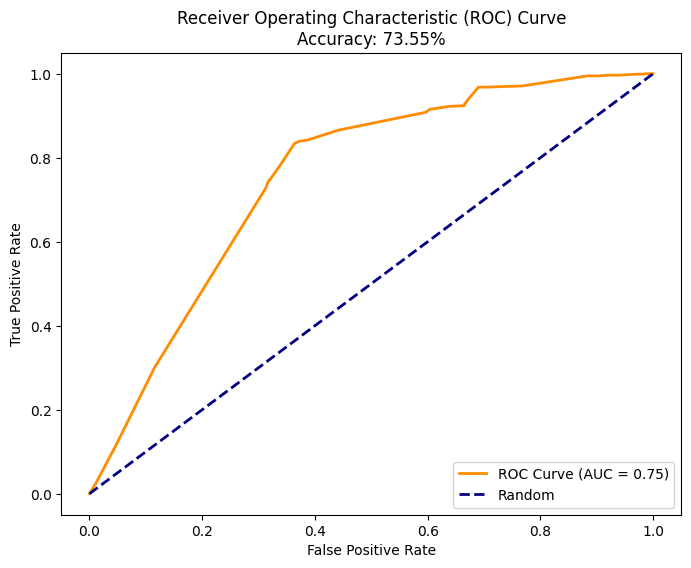

In [53]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()

#### 3.4 XGBoost

In [54]:
# fit model no training data
model = XGBClassifier(random_state = 7)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)

In [55]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 74.55%


##### Evaluate the model


In [56]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1763 1124]
 [ 352 2560]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.61      0.70      2887
           1       0.69      0.88      0.78      2912

    accuracy                           0.75      5799
   macro avg       0.76      0.74      0.74      5799
weighted avg       0.76      0.75      0.74      5799



##### ROC

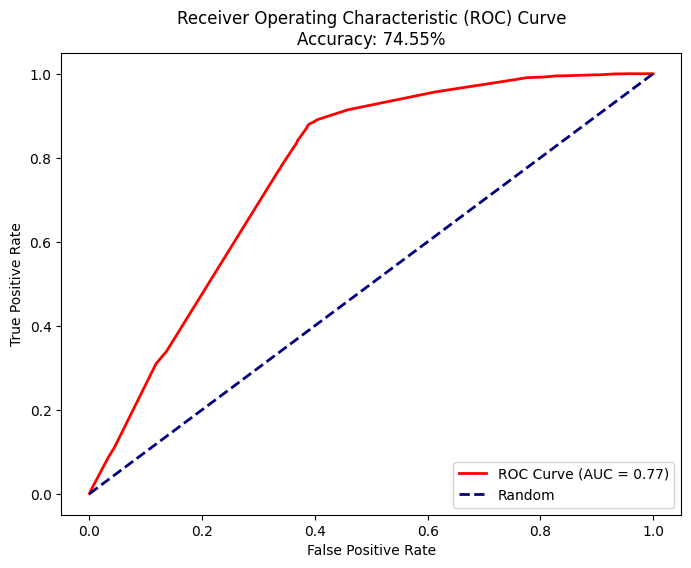

In [57]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2,
		label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
	accuracy * 100))
plt.legend(loc="lower right")
plt.show()

#### 3.5 Conclusion

From result above show XGBoost give a best result compare to Logistic Regression where the Accuracy and Precison of XGBoost were (0.75, 0.85) while for Logistic Regression were (0.74, 0.80).

From ROC Chart, XGBoost also show the better result compare to Logistic Regression were the ROC Curve (AUC) for XGBoost was 0.77 while for Logistic Regression was 0.75

From this result, XGBoost will choose as the model.

## 4. FastAPI (Save prediction model)

In [58]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset (replace with actual loading code)
data = pd.read_csv('./VIFD/car_insurance_fraud.csv')

# Assuming 'FraudFound_P' is the column name for the target variable
X = data.drop(columns=['FraudFound_P'])
y = data['FraudFound_P']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(model, "./VIFD/car_insurance_fraud_model.joblib")


['./VIFD/car_insurance_fraud_model.joblib']